In [1]:
%run script/setup.py

# Citations information from OpenAlex

In [2]:
BASE_URL = 'https://api.openalex.org/'
ENDPOINT = 'authors'
MAIL = 'elsa@itu.dk'
mail = f'&mailto={MAIL}'

complete_url = BASE_URL + ENDPOINT

In [3]:
# load data
df_invited = pd.read_csv('Data/factInvited.csv')
df_proceedings = pd.read_csv('Data/factProceedings.csv')

df = pd.concat([df_invited, df_proceedings], ignore_index=True)
pd.set_option('display.max_rows', 15)

In [4]:
full_name = df['Full name'].unique()

len(full_name)

67381

## Analysis

In [10]:
data_types = {
              'Full name' : str
             }

converters = {
              'OpenAlex ID' : pre.tranform_to_list_of_string,
              'ORCID' : pre.tranform_to_list_of_string,
              'Works count' : pre.tranform_to_list_of_int
}

df_author = pd.read_csv('Data/authorID.csv.gz', dtype=data_types, converters=converters, compression='gzip')

In [11]:
df_author

,Full name,OpenAlex ID,ORCID,Works count
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...","[https://orcid.org/0000-0002-8053-9983, None, ...","[420, 148, 1, 1]"
1,Astro Teller,[https://openalex.org/A5046049741],[None],[20]
2,Daniel J. Clancy,[https://openalex.org/A5001852581],[None],[100]
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...","[None, None]","[199, 11]"
4,Ian Lane Davis,[https://openalex.org/A5043141178],[None],[15]
...,...,...,...,...
67376,Rustam Galimullin,"[https://openalex.org/A5064340585, https://ope...","[https://orcid.org/0000-0003-4195-8189, None]","[28, 1]"
67377,Tiziano Dalmonte,[https://openalex.org/A5019687464],[https://orcid.org/0000-0002-7153-0506],[21]
67378,Tomas Svoboda,"[https://openalex.org/A5046322438, https://ope...","[https://orcid.org/0000-0002-7184-1785, https:...","[95, 410, 13, 9, 130, 3, 2, 1, 2, 0]"
67379,Tomoyuki Yamakami,"[https://openalex.org/A5085555714, https://ope...","[None, None]","[221, 2]"


Checking for missing data due to API failures, authors not found on OpenAlex, and authors without a ORCID.

In [12]:
failures = 0
not_found = 0
no_ORCID = 0

missed_authors = []

for index, i in enumerate(df_author['OpenAlex ID']):

    if np.nan in i:
        failures += 1
        missed_authors.append(index)
    if None in i:
        not_found += 1

no_ORCID = 0
for i in df_author['ORCID']:

    if None in i:

        no_ORCID += 1

print('API failures:', failures)
print('Missing authors:', not_found)
print('Missing ORCID:', no_ORCID)

API failures: 0
Missing authors: 303
Missing ORCID: 58175


Disambiguation problem: how many result I find for each author??

In [13]:
number_of_results = df_author['OpenAlex ID'].apply(len)
df_author['Number of results'] = number_of_results
multiple_authors = number_of_results[number_of_results>1]

print(f"author with multiple results: {len(multiple_authors)} ({(len(multiple_authors)/len(full_name))} %)")

# Create the histogram
# plt.hist(number_of_results[number_of_results>25], bins=range(min(number_of_results[number_of_results>25]), max(number_of_results[number_of_results>25]) + 2), edgecolor='black', align='left');

author with multiple results: 43974 (0.6526172066309494 %)


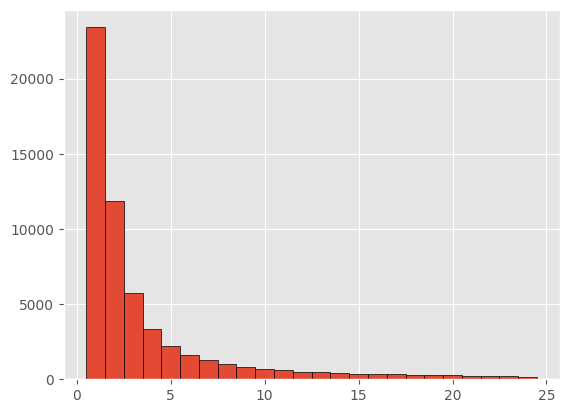

In [14]:
plt.hist(number_of_results[number_of_results<25], bins=range(min(number_of_results[number_of_results<25]), max(number_of_results[number_of_results<25]) + 2), edgecolor='black', align='left');

## Comparing cleaned and dirty dataframe

In [18]:
data_types = {
              'Full name' : str
             }

converters = {
              'OpenAlex ID' : pre.tranform_to_list_of_string,
              'ORCID' : pre.tranform_to_list_of_string,
              'Works count' : pre.tranform_to_list_of_int
}

df_author_cleaned = pd.read_csv('Data/authorID_cleaned.csv.gz', dtype=data_types, converters=converters, compression='gzip')

author with multiple results: 42921 (0.6369896558376991 %)


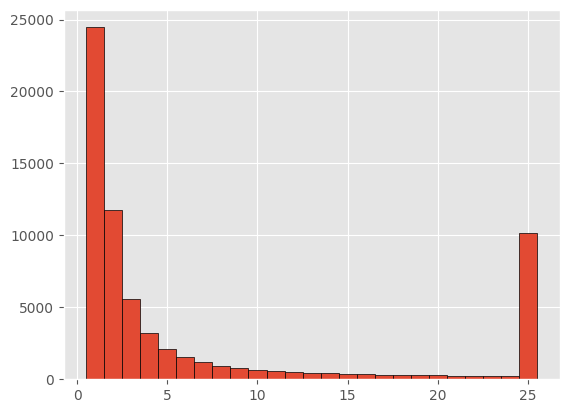

In [19]:
number_of_results = df_author_cleaned['OpenAlex ID'].apply(len)
df_author_cleaned['Number of results'] = number_of_results
multiple_authors = number_of_results[number_of_results>1]

print(f"author with multiple results: {len(multiple_authors)} ({(len(multiple_authors)/len(full_name))} %)")

# Create the histogram
plt.hist(number_of_results, bins=range(min(number_of_results), max(number_of_results) + 2), edgecolor='black', align='left');

In [24]:
disambiguated_authors = (df_author['Number of results'] > 1)
reduced_nor = (df_author['Number of results'] != df_author_cleaned['Number of results'])
nan = (pd.isna(df_author_cleaned['Computer science works']))

In [25]:
indeces = df_author_cleaned[disambiguated_authors & reduced_nor].index
df_author_cleaned[disambiguated_authors & reduced_nor]

,Full name,OpenAlex ID,ORCID,Works count,Number of results,Computer science works
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]",3,"[104, 57, 1]"
3,Edward Feigenbaum,[https://openalex.org/A5052827274],[None],"[199, 11]",1,[72]
5,Martha E. Pollack,[https://openalex.org/A5069313083],[None],"[218, 1]",1,[126]
6,Paul Cohen,"[https://openalex.org/A5039490548, https://ope...","[https://orcid.org/0000-0002-4860-9232, https:...","[180, 543, 503, 225, 482, 189, 305, 74, 572, 1...",8,"[10, 19, 287, 10, 56, 7, 1, 4]"
7,Peter Norvig,[https://openalex.org/A5080389385],[None],"[127, 2]",1,[70]
...,...,...,...,...,...,...
67351,Luiz Carlos Pereira,"[https://openalex.org/A5086362988, https://ope...","[https://orcid.org/0009-0003-8234-3380, https:...","[177, 709, 173, 61, 2, 157, 319, 15, 106, 225,...",25,NaN
67353,Nicolas González,"[https://openalex.org/A5060328662, https://ope...","[https://orcid.org/0000-0003-2461-1247, https:...","[214, 61, 64, 18, 68, 85, 95, 363, 161, 98, 76...",25,NaN
67355,Sonia Marin,"[https://openalex.org/A5002636759, https://ope...","[https://orcid.org/0000-0002-8950-2458, https:...","[291, 22, 5, 2, 9, 18, 4, 1, 1, 5, 1, 1, 1, 1,...",25,NaN
67369,Leonardo Pacheco,"[https://openalex.org/A5016361923, https://ope...","[https://orcid.org/0000-0002-8653-6206, https:...","[121, 250, 7, 151, 23, 2, 282, 5, 6, 19, 80, 6...",25,NaN


## Trying to filter data

In [ ]:
df_author['Number of results'] = number_of_results
df_author[(df_author['Number of results'] > 1) & (df_author['Number of results'] < 25)]

,Full name,OpenAlex ID,ORCID,Works count,Number of results
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]",3
7,Peter Norvig,"[https://openalex.org/A5080389385, https://ope...",[None],"[127, 2]",2
8,Russ B. Altman,"[https://openalex.org/A5084043782, https://ope...",[https://orcid.org/0000-0003-3859-2905],"[611, 258, 1, 1]",3
12,Chitta Baral,"[https://openalex.org/A5083735830, https://ope...",[None],"[503, 1, 2]",2
14,James A. Hendler,"[https://openalex.org/A5010414972, https://ope...",[https://orcid.org/0000-0003-3056-1960],"[514, 99]",2
...,...,...,...,...,...
67371,Mattia Panettiere,"[https://openalex.org/A5031603467, https://ope...",[https://orcid.org/0000-0002-9218-5449],"[24, 2]",2
67374,Pierre Ludmann,"[https://openalex.org/A5036163316, https://ope...",[None],"[9, 1]",2
67376,Rustam Galimullin,"[https://openalex.org/A5064340585, https://ope...",[https://orcid.org/0000-0003-4195-8189],"[28, 1]",2
67378,Tomas Svoboda,"[https://openalex.org/A5046322438, https://ope...","[https://orcid.org/0000-0003-2734-4746, https:...","[95, 410, 13, 9, 130, 3, 2, 1, 2]",9


In [ ]:
df_disambiguated = df_author[(df_author['Number of results'] > 1) & (df_author['Number of results'] < 25)]
df_disambiguated_long = df_author[df_author['Number of results'] >= 25]

In [ ]:
df_cleaned= df_author.copy()
df_cleaned['Computer science works'] = [None]*len(df_author)

for j in range(0, len(df_disambiguated), chunk_size):

    chunk = df_disambiguated[j:j+chunk_size]

    for index, possible_authors in chunk.items():

        number_cs_works = []
        cs_authors = []

        for candidate in possible_authors:

            filtered_authors = filter_authors_for_field(candidate)
            if filtered_authors is not None:
                cs_authors.append(filtered_authors[0])
                number_cs_works.append(filtered_authors[1])
        
        df_cleaned.at[index, 'OpenAlex ID'] = cs_authors
        df_cleaned.at[index, 'Computer science works'] = number_cs_works

NameError: name 'chunk_size' is not defined

## Domains
Domains seem to be 25 but they are actually 4 and none of them is computer sciences. Most likely, computer science is the subfield within Physical Sciences domain. I do not want to try my luck.

In [ ]:
complete_url = 'https://api.openalex.org/topics'
filter = '?select=domain'
complete_url = complete_url + filter + mail
response = requests.get(complete_url).json()
domains = response['results']

https://api.openalex.org/topics?select=domain&mailto=elsa@itu.dk


In [ ]:
domains

[{'domain': {'id': 'https://openalex.org/domains/3',
   'display_name': 'Physical Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/3',
   'display_name': 'Physical Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/1',
   'display_name': 'Life Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_nam

## Search for an author by its name

In [ ]:
i = 'Stronzo bestiale'
filter = f'?search={i}&select=id,orcid,works_count'
complete_url = BASE_URL + ENDPOINT + filter
response_json = requests.get(complete_url).json()
author_data = response_json['results']

In [ ]:
author_data

[{'id': 'https://openalex.org/A5074178785', 'orcid': None, 'works_count': 3}]

Notes on how to retrieve the works of an autor from a start to an end date

In [ ]:
id = df_author_id['OpenAlex ID'][0][0]
id = id.split('/')[-1]
ENDPOINT =  'works'
filter = f'?filter=authorships.author.id:{id},from_publication_date:{start_date},to_publication_date:{end_date}'
complete_url = BASE_URL + ENDPOINT + filter + mail
print(complete_url)

Prova

In [ ]:
id = df_author_id['OpenAlex ID'][0][0]
id = id.split('/')[-1]
ENDPOINT =  'author'
filter = f'?filter=authorships.author.id:{id},from_publication_date:{start_date},to_publication_date:{end_date}'
complete_url = BASE_URL + ENDPOINT + filter + mail
print(complete_url)

## Understand how back in time I can go.

In [ ]:
ENDPOINT = 'works'

for year in range(1900, 1690, -10):

    end_date = f'{year}-01-01'
    filter = f'?filter=to_publication_date:{end_date}'
    complete_url = BASE_URL + ENDPOINT + filter + mail

    response = requests.get(complete_url)
    response_json = response.json()

In [ ]:
response_json

{'meta': {'count': 18892,
  'db_response_time_ms': 21,
  'page': 1,
  'per_page': 25,
  'groups_count': None},
 'results': [{'id': 'https://openalex.org/W4233014035',
   'doi': 'https://doi.org/10.1007/978-1-4899-3324-9',
   'title': 'Density Estimation for Statistics and Data Analysis',
   'display_name': 'Density Estimation for Statistics and Data Analysis',
   'publication_year': 1400,
   'publication_date': '1400-01-01',
   'ids': {'openalex': 'https://openalex.org/W4233014035',
    'doi': 'https://doi.org/10.1007/978-1-4899-3324-9'},
   'language': 'en',
   'primary_location': {'is_oa': False,
    'landing_page_url': 'https://doi.org/10.1007/978-1-4899-3324-9',
    'pdf_url': None,
    'source': {'id': 'https://openalex.org/S4306463937',
     'display_name': 'Springer eBooks',
     'issn_l': None,
     'issn': None,
     'is_oa': False,
     'is_in_doaj': False,
     'is_core': False,
     'host_organization': 'https://openalex.org/P4310319965',
     'host_organization_name': 'Spr

I can still find result so back in time (1690). This should not worry us.